## WEEK4. Coding homework (18-05-29, 정누리)
### part2_겹치는 데이터셋
#### Reference
- generating data : http://solarisailab.com/archives/2271
- merging df : https://pandas.pydata.org/pandas-docs/stable/merging.html
- logistic regression using statsmodels, LDA, QDA : https://nbviewer.jupyter.org/github/emredjan/ISL-python/blob/master/labs/lab_04.6_logistic_regression_lda_qda_knn.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sns.set()

## 1. 시뮬레이션 데이터 구성하기 (겹치는 데이터셋 구성)
2개의 well seperable하지 않은 Gaussian distribution 시뮬레이션 데이터 구성하기 (numpy.random.normal 활용) - 2차원, 3차원, 4차원

#### 두 개의 클래스로 나뉘어지는 데이터셋 생성하는 함수 만들기

In [3]:
def generating_dataset(mu_a, sigma_a, mu_b, sigma_b, n):
    s_a = np.random.normal(mu_a, sigma_a, n)
    s_b = np.random.normal(mu_b, sigma_b, n)
    y_a = np.random.normal(1,0,n)
    y_b = np.random.normal(0,0,n)
    df1 = pd.DataFrame(np.array([s_a, y_a])).T
    df2 = pd.DataFrame(np.array([s_b, y_b])).T
    df = df1.append(df2)
    df.columns = ['X','y']
    return df

In [83]:
df_x1 = generating_dataset(0,0.5, 1,0.5, 2000)

In [84]:
df_x2 = generating_dataset(180, 13, 160, 13, 2000)

In [85]:
df_x3 = generating_dataset(20, 7, 30, 10, 2000)

In [86]:
df_final = pd.concat([df_x1, df_x2,df_x3], axis=1)
df_final.columns = ['X1', 'y1','X2','y2', 'X3','y3'] 
df_final
del df_final['y1']
del df_final['y2']
print(df_final.head())
len(df_final)

         X1          X2         X3   y3
0  0.485862  185.137208  23.837759  1.0
1 -0.115578  177.044999  26.054846  1.0
2 -0.564894  189.175969  33.914943  1.0
3  0.649474  163.184931  20.187420  1.0
4 -0.605484  170.410281  14.860201  1.0


4000

#### 2차원 그래프 그리기

AxesSubplot(0.125,0.125;0.775x0.755)


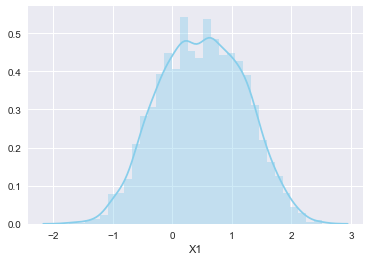

In [87]:
print(sns.distplot(df_final["X1"] , color="skyblue"))

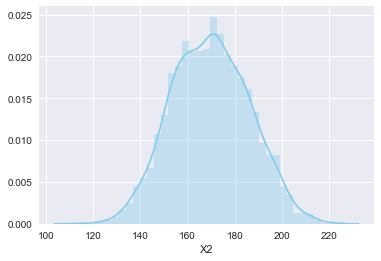

In [88]:
sns.distplot(df_final["X2"] , color="skyblue")

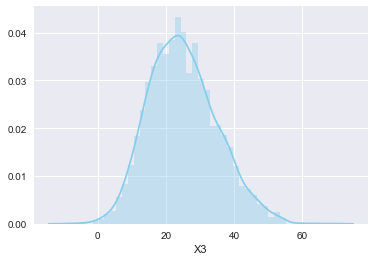

In [89]:
sns.distplot(df_final["X3"] , color="skyblue")

In [90]:
from mpl_toolkits import mplot3d

In [91]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from matplotlib.mlab import bivariate_normal

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [94]:
X1 = df_final["X1"]
X2 = df_final["X2"]
X3 = df_final["X3"]

#### 3차원 그래프 그리기
- ....? 산이 2 개씩 나와야 하는데 이렇게 나오네요. 흠... X1, X2, X3의 관측치 전체를 가지고 다시 평균, 표준편차를 내고 이를 기반으로 그려서 그런가요...????

In [95]:
def draw_3d_density(a,b):
    a, b = np.meshgrid(a,b)
    Z=bivariate_normal(a, b, a.std(), b.std(), a.mean(), b.mean()) 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(a, b, Z,cmap='viridis',linewidth=5)
    ax.set_xlabel('a axis')
    ax.set_ylabel('b axis')
    ax.set_zlabel('Z axis')
    return(plt.show())

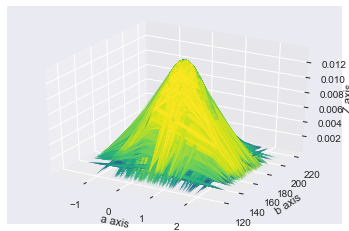

In [96]:
draw_3d_density(X1,X2)

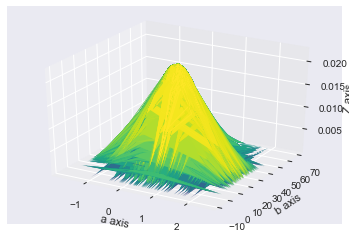

In [97]:
draw_3d_density(X1,X3)

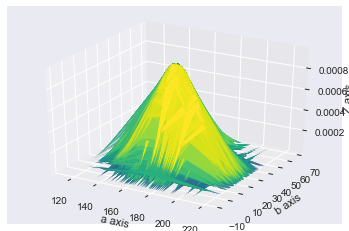

In [98]:
draw_3d_density(X2,X3)

In [99]:
from pandas.plotting import scatter_matrix

In [100]:
df_final.head()

,X1,X2,X3,y3
0,0.485862,185.137208,23.837759,1.0
1,-0.115578,177.044999,26.054846,1.0
2,-0.564894,189.175969,33.914943,1.0
3,0.649474,163.184931,20.187420,1.0
4,-0.605484,170.410281,14.860201,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A15BC78240>,
      dtype=object)

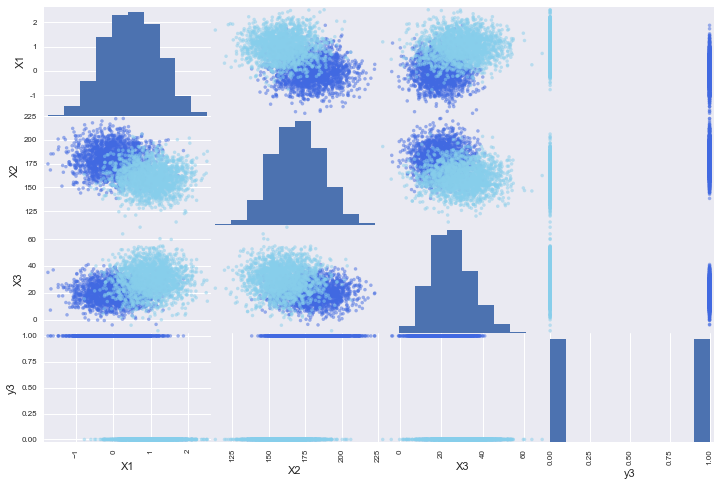

In [101]:
attributes = df_final.columns
y_class = df_final["y3"]
colors_palette={0.0:'skyblue',1.0:'royalblue'} 
colors = [colors_palette[c] for c in y_class]
scatter_matrix(df_final[attributes], figsize=(12, 8), c=colors)

In [102]:
df_final.corr()

,X1,X2,X3,y3
X1,1.000000,-0.440870,0.363207,-0.709481
X2,-0.440870,1.000000,-0.311031,0.612543
X3,0.363207,-0.311031,1.000000,-0.508436
y3,-0.709481,0.612543,-0.508436,1.000000


## 2. Split hold-out dataset

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df_X = df_final.loc[:,['X1','X2','X3']]
df_X.head()

,X1,X2,X3
0,0.485862,185.137208,23.837759
1,-0.115578,177.044999,26.054846
2,-0.564894,189.175969,33.914943
3,0.649474,163.184931,20.187420
4,-0.605484,170.410281,14.860201


In [105]:
df_y = df_final.loc[:,'y3']
df_y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: y3, dtype: float64

##### 원본 데이터에서 30% holdout 분리. 70% 데이터 안에서 다시 train, test 80%:20%로 나눔

In [106]:
X_hold, X_holdout, y_hold, y_holdout = train_test_split(df_X, df_y, test_size = 0.3, random_state =42)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_hold, y_hold, test_size = 0.2, random_state =42)

## 3-1. 로지스틱 회귀분석

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

In [109]:
log_reg = LogisticRegression()
result = log_reg.fit(X_train,y_train)
log_reg.coef_

array([[-3.78369577,  0.06838919, -0.13504881]])

In [110]:
y_pred = log_reg.predict(X_test)

In [111]:
print('Accuracy: ' + str(accuracy_score(y_test, log_reg.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, log_reg.predict(X_test))))

Accuracy: 0.9142857142857143
Test Error: 0.08571428571428574


In [112]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[245  28]
 [ 20 267]]
             precision    recall  f1-score   support

        0.0       0.92      0.90      0.91       273
        1.0       0.91      0.93      0.92       287

avg / total       0.91      0.91      0.91       560



In [113]:
# labeled confusion matrix for predicted values
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,245,28
1,20,267


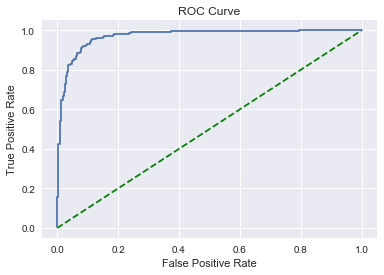

In [114]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'g--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### statsmodels로 로지스틱 회귀분석 하기 
- sklearn에서 coefficient 의 variance를 확인하는 방법을 찾지 못해서, statsmodels를 사용했습니다. 
- 아래 결과를 보시면, 확실히 잘 나뉜 데이터넷에서 로지스틱 회귀분석을 했을 때, coefficient의 variance가 매우 큰 것을 확인할 수 있었습니다. 

In [78]:
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score

In [115]:
log_reg_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()
log_reg_sm.summary2()

Optimization terminated successfully.
         Current function value: 0.202834
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   8.0000  
Dependent Variable: y3               Pseudo R-squared: 0.707   
Date:               2018-05-30 02:45 AIC:              916.6975
No. Observations:   2240             BIC:              939.5545
Df Model:           3                Log-Likelihood:   -454.35 
Df Residuals:       2236             LL-Null:          -1551.9 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
----------------------------------------------------------------
const   -14.2901    1.2208  -11.7057  0.0000  -16.6828  -11.8974
X1       -4.0080    0.2188  -18.3164  0.0000   -4.4369   -3.5791
X2        0.1142    0.0075   15.2636  0.0000    0.0996    0.1289
X3       -0.1307    0.0106  -12.3028  0.0000   -0.1516   -0.1099
===============================================================

"""

In [116]:
log_reg_sm.predict()

array([7.17759801e-01, 9.95166288e-01, 6.12472022e-01, ...,
       1.01346281e-04, 9.82781543e-01, 5.12614303e-01])

In [117]:
log_reg_sm.pred_table()

array([[1062.,   87.],
       [  90., 1001.]])

### 5-fold cross validation

In [128]:
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score

In [135]:
result_log_reg_accuracy = cross_val_score(log_reg, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_log_reg_accuracy)
print(result_log_reg_accuracy.mean())
print(result_log_reg_accuracy.var())

[0.92335116 0.9144385  0.89821429 0.92307692 0.90518784]
0.9128537411061352
9.806009159557655e-05


In [137]:
predicted = cross_validation.cross_val_predict(log_reg, X_hold, y_hold, cv=5)

In [138]:
print(metrics.classification_report(y_hold, predicted))

             precision    recall  f1-score   support

        0.0       0.92      0.91      0.91      1422
        1.0       0.91      0.92      0.91      1378

avg / total       0.91      0.91      0.91      2800



## 3-2. LDA

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_fit = lda_model.fit(X_train, y_train)

In [157]:
lda_fit.priors_ # group priors

array([0.51294643, 0.48705357])

In [158]:
lda_fit.means_ # group means

array([[ 9.95453999e-01,  1.59907358e+02,  2.99768085e+01],
       [-1.39838374e-02,  1.79640866e+02,  2.01423672e+01]])

In [159]:
lda_fit.scalings_ # coefficients of ld

array([[-1.46930704],
       [ 0.04208223],
       [-0.04857735]])

In [160]:
conf_m = pd.DataFrame(confusion_matrix(y_test, lda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,245,28
1,21,266


In [161]:
print('Accuracy: ' + str(accuracy_score(y_test, lda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, lda_fit.predict(X_test))))

Accuracy: 0.9125
Test Error: 0.08750000000000002


### 5-fold cross-validation

In [169]:
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
result_LDA_accuracy = cross_val_score(lda_model, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_LDA_accuracy)
print(result_LDA_accuracy.mean())
print(result_LDA_accuracy.var())

predicted_LDA = cross_validation.cross_val_predict(lda_model, X_hold, y_hold, cv=5)
print(metrics.classification_report(y_hold, predicted_LDA))

[0.92513369 0.92691622 0.91428571 0.9177102  0.91234347]
0.9192778584844248
3.3620029434249336e-05
             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92      1422
        1.0       0.91      0.92      0.92      1378

avg / total       0.92      0.92      0.92      2800



## 3-3. QDA

In [163]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_fit = qda_model.fit(X_train, y_train)

In [164]:
qda_fit.priors_ # group priors

array([0.51294643, 0.48705357])

In [165]:
qda_fit.means_ # group means

array([[ 9.95453999e-01,  1.59907358e+02,  2.99768085e+01],
       [-1.39838374e-02,  1.79640866e+02,  2.01423672e+01]])

In [166]:
qda_fit.scalings_ # coefficients of ld

[array([166.55361549, 102.59207691,   0.2503293 ]),
 array([171.40807947,  50.21389004,   0.24782589])]

In [167]:
conf_m = pd.DataFrame(confusion_matrix(y_test, qda_fit.predict(X_test)))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,247,26
1,21,266


In [168]:
print('Accuracy: ' + str(accuracy_score(y_test, qda_fit.predict(X_test))))
print('Test Error: ' + str(1 - accuracy_score(y_test, qda_fit.predict(X_test))))

Accuracy: 0.9160714285714285
Test Error: 0.08392857142857146


### 5-fold cross-validation

In [171]:
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
result_QDA_accuracy = cross_val_score(qda_model, X_hold, y_hold, cv=5, scoring = 'accuracy') 
print(result_QDA_accuracy)
print(result_QDA_accuracy.mean())
print(result_QDA_accuracy.var())

predicted_QDA = cross_validation.cross_val_predict(qda_model, X_hold, y_hold, cv=5)
print(metrics.classification_report(y_hold, predicted_QDA))

[0.92513369 0.93404635 0.90892857 0.93023256 0.91055456]
0.9217791453872165
0.00010486517830216397
             precision    recall  f1-score   support

        0.0       0.92      0.92      0.92      1422
        1.0       0.92      0.92      0.92      1378

avg / total       0.92      0.92      0.92      2800

